# $\chi^2$ as BIC

In [1]:
# imports
from importlib import reload
from importlib.resources import files
import os
import numpy as np

from scipy.optimize import curve_fit

import pandas
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.interpolate import interp1d

from ocpy.hydrolight import loisel23
from ocpy.utils import plotting as oc_plotting

In [2]:
%matplotlib ipympl

# Make up some data

In [39]:
npts = 10
x = np.arange(npts)
y = 1. + 2. * x
# add error
np.random.seed(seed=1234)
ysig = 2.
yval = y + ysig * np.random.normal(size=10)

# Fit

In [40]:
line_fit = np.polyfit(x, yval, 1)
line_fit

array([1.74300538, 1.86910882])

In [51]:
deg2 = np.polyfit(x, yval, 2)
deg4 = np.polyfit(x, yval, 4)
deg8 = np.polyfit(x, yval, 8)
deg9 = np.polyfit(x, yval, 9)
#
p1 = np.poly1d(line_fit)
p2 = np.poly1d(deg2)
p4 = np.poly1d(deg4)
p8 = np.poly1d(deg8)
p9 = np.poly1d(deg9)

# $\chi^2$

In [52]:
chi2s = []
for ndeg, p in zip([2,5,9], [p1, p4, p8]):
    chi2_red = np.sum( (yval-p(x))**2 / ysig**2) / (npts-ndeg)
    chi2s.append(chi2_red)

# Plot

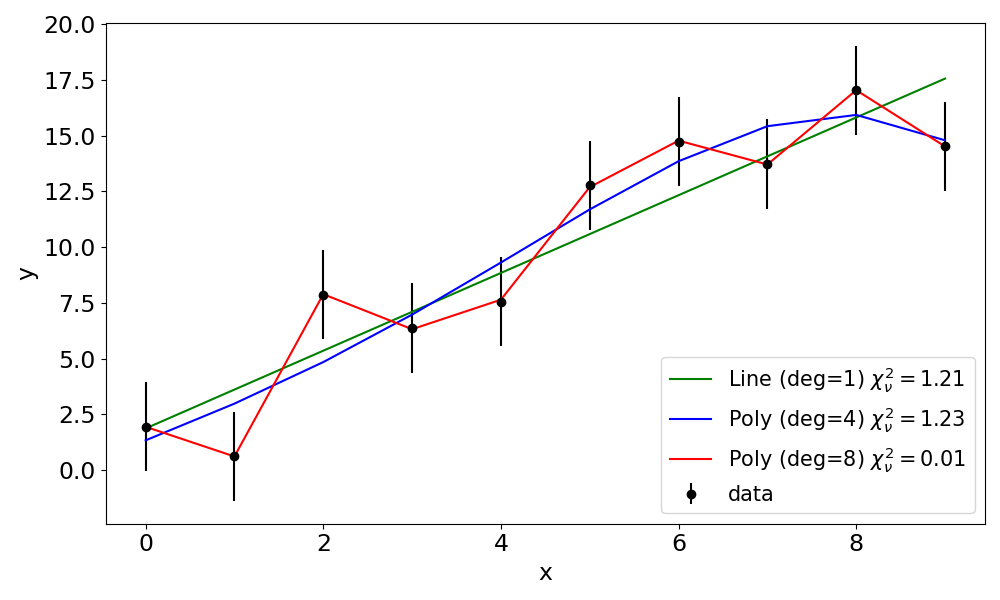

In [65]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
#
ax.errorbar(x, yval, ysig, fmt='o', color='k', label='data')
# Fits
show_line = True
if show_line:
    ax.plot(x, line_fit[1] + line_fit[0]*x, 'g', label='Line (deg=1)'+r' $\chi_\nu^2=$'+f'{chi2s[0]:0.2f}')
show_fits = True
if show_fits:
    ax.plot(x, p4(x), 'b', label='Poly (deg=4)'+r' $\chi_\nu^2=$'+f'{chi2s[1]:0.2f}')
    ax.plot(x, p8(x), 'r', label='Poly (deg=8)'+r' $\chi_\nu^2=$'+f'{chi2s[2]:0.2f}')

#
ax.legend(fontsize=15., loc='lower right')
oc_plotting.set_fontsize(ax, 17.)

# chi2
#ax.text(0.9, 0.1, r'$\chi_\nu^2$'+'\n'+f'{chi2s[0]:0.2f}',
#        fontsize=17, transform=ax.transAxes,
#            ha='right')

# Label
ax.set_xlabel('x')
ax.set_ylabel('y')
#
#ax.set_yscale('log')
plt.tight_layout()
plt.show()